In [33]:
import numpy as np
import matplotlib.pyplot as plt

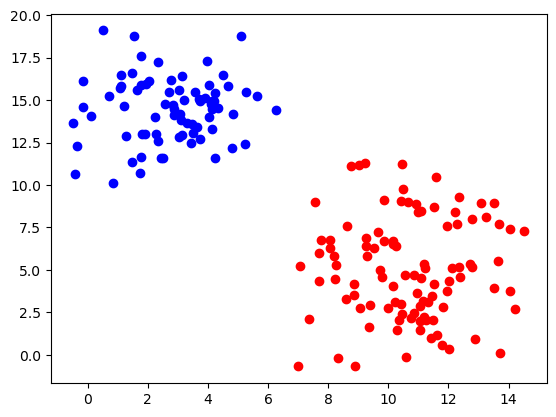

(175, 2)


In [34]:
x1 = np.random.normal(loc=11, scale=2.0, size=100)
y1 = np.random.normal(loc=5, scale=3.0, size=100)

x2 = np.random.normal(loc=3, scale=1.5, size=75)
y2 = np.random.normal(loc=15, scale=2.0, size=75)

# X = np.expand_dims(np.append(x1,x2),axis=1)
# Y = np.expand_dims(np.append(y1,y2),axis=1)

# data = np.concatenate((X,Y),axis=1)

X = np.append(x1,x2)
Y = np.append(y1,y2)
#plot data with color
plt.scatter(x1,y1,c='r')
plt.scatter(x2,y2,c='b')
plt.show() 
data = np.column_stack((X,Y))

print(data.shape)

In [35]:
def ecl(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [36]:
def cost_calc(datapoints,label):
    memoid_ind = np.where(label==-1)[0]
    cost=0
    for i,d in enumerate(datapoints):
        if label[i]==-1:
            continue
        dist = [ecl(d,datapoints[c]) for c in memoid_ind]
        min_dist_ind = np.argmin(dist)
        label[i] = min_dist_ind
        cost+=dist[min_dist_ind]
    return cost,label

In [37]:
def k_memoid(datapoints,k):

    label = np.zeros(shape = datapoints.shape[0])
    memoid_ind = np.random.choice(datapoints.shape[0],k,replace=False)
    label[memoid_ind]=-1
    cost,label = cost_calc(datapoints,label)

    prevcost = cost+1
    itr=0;
    while prevcost>cost:
        print(str(itr+1)+" iterations, cost: ",cost)
        # print_graph(datapoints,label,datapoints[memoid_ind],k)
        itr+=1
        prevcost = cost
        for m_ind,m in enumerate(memoid_ind):
            for i, d in enumerate(datapoints):
                if(label[i]==-1):
                    continue
                temp = label[i]
                label[i]=-1
                label[m]= 0

                newcost,label = cost_calc(datapoints,label)
                if(newcost<cost):
                    cost=newcost
                    memoid_ind[m_ind]=i
                    break

                label[m]=-1
                label[i] = temp
    
    cost,label = cost_calc(datapoints,label)
    return memoid_ind,label

In [38]:
memoid_ind, label = k_memoid(data,2)
memoid = data[memoid_ind]
print("memoids: ",memoid,'\n',"labels: ",label)

1 iterations, cost:  544.2667506110112
2 iterations, cost:  515.5876956467065
3 iterations, cost:  477.2652932211776
4 iterations, cost:  471.0640997545756
5 iterations, cost:  471.001291224022
memoids:  [[10.85758236  4.70637893]
 [ 2.8829582  14.45820212]] 
 labels:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1. -1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [52]:
def print_graph(datapoint,label,memoid,k):
    for i in range(k):
        points=datapoint[label==i]
        plt.scatter(points[:,0],points[:,1],label="Cluster: "+str(i+1))
        plt.scatter(memoid[0][i],memoid[i][1],label="Memoid: "+str(i+1))
        plt.scatter(memoid[0][i],memoid[i][1], alpha=0.2, s=40000)
    plt.legend()
    plt.show()

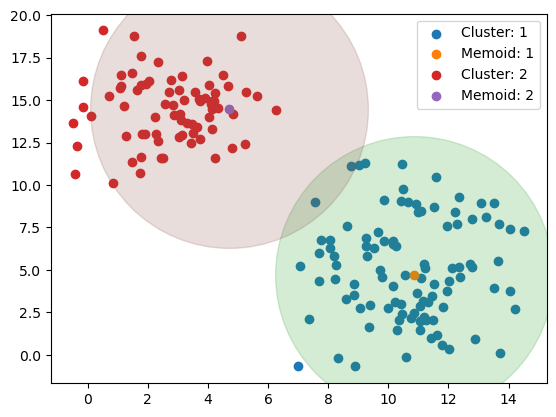

In [53]:
print_graph(data,label,memoid,memoid.shape[0])

In [66]:
#apply knn to classify new data
new_data = np.array([[10,4],[2,14],[5,6],[4,5],[10,10]])
def knn(datapoint,label,memoid,k):
    for i in range(k):
        points=datapoint[label==i]
        plt.scatter(points[:,0],points[:,1],label="Cluster: "+str(i+1))
        plt.scatter(memoid[0][i],memoid[i][1],label="Memoid: "+str(i+1))
        plt.scatter(memoid[0][i],memoid[i][1], alpha=0.2, s=40000)
    plt.legend()
    plt.show()

   
    new_label = np.zeros(shape=new_data.shape[0])
    for i,d in enumerate(new_data):
        dist = [ecl(d,datapoint[c]) for c in memoid_ind]
        min_dist_ind = np.argmin(dist)
        new_label[i] = min_dist_ind
    print("new data: ",new_data,'\n',"labels: ",new_label)


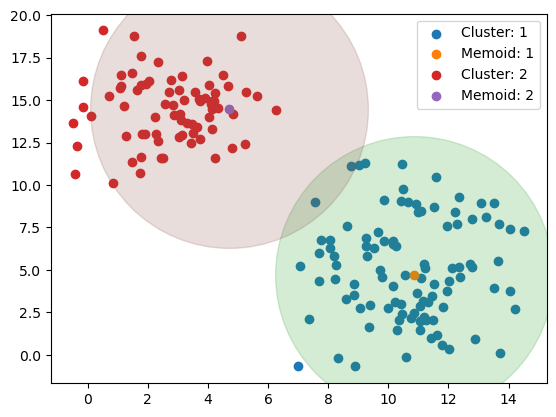

new data:  [[10  4]
 [ 2 14]
 [ 5  6]
 [ 4  5]
 [10 10]] 
 labels:  [0. 1. 0. 0. 0.]


In [67]:
knn(data,label,memoid,memoid.shape[0])

In [71]:
#plot with new data point and the cluster it belongs to
plt.scatter(new_data[:,0],new_data[:,1],c=new_label)
plt.show()



NameError: name 'new_label' is not defined